# Matriz de densidad

In [2]:
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector
import numpy as np

from qiskit.visualization import plot_bloch_multivector

Circuito cuántico que produce un estado de entrelazamiento maximo de dos qubits o un estado de bell.

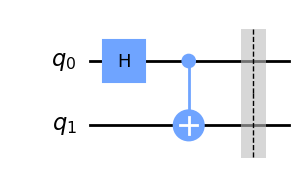

In [3]:
cc_AB = QuantumCircuit(2)
cc_AB.h(0)
cc_AB.cx(0,1)
cc_AB.barrier()
cc_AB.draw('mpl')

Escribimos el estado en la salida del sistema

In [32]:
psi_AB = qi.Statevector.from_instruction(cc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

Observamos lo siguiente: El estado del sistema es el estado entrelazado $ \ket{\psi_{AB}} $, el cual es escrito como una superposición de los estados $ \{ \ket{00}, \ket{11} \}$, es decir, es un estado puro; pero, no se puede obtener como el producto tensorial de estados, es decir, de la forma $\ket{\psi_{AB}} \neq \ket{\phi_A} \otimes  \ket{\varphi_B}$. 

(¿Que quiere decir que no lo puedo obtener como el producto  tensorial de otros estados?, que, no se forma como la composición de dos sistemas independientes, o mejor de dos estados independientes, en este caso podria escribir el producto tensorial de dos estados que forman un estado compuesto, sin embargo, dos estados entrelazados, provienen de estados "completamente" correlacionados, tanto, que no se pueden separar o identificar en la representación estandar como dos sistemas. Por lo que requerimos de otra  representación.)

Ahora, cada qubit, es un sistema cuántico, sin embargo, no podemos obtener una representación como superpocisión o producto tensorial de otros estados, dado que proviene de un estado entrelazado. A este tipo de estados le llamamos estados mixtos.

La representación que estudiamos, es hallar la matriz de densidad del estado del sistema, lo cual nos permite encontrar la matriz de densidad de los subsistemas.

- Matriz densidad esta definida por un conjunto de estados puros $\{ \ket{\psi_i}\}_{i=1}^n$ y sus probabilidades clásicas $\{ p_i \}_{i=1}^n$, de la siguiente forma: $$ \rho = \sum_{i=1}^n p_i \ket{\psi_i}\bra{\psi_i} $$. Es importante que en la matriz de densidad el número $n$ de estados no corresponde necesariamente con la dimension del espacio de Hilbert.
- Para describir el estado mixto de un qubit, tenemos una matriz de $2\times2$. Por ejemplo, si identificamos el estado $\psi_B$ con el estado mixto en el circuito anterior de la evolución del qubit $0$, obtenemos que depende de los estados $\{ \ket{0}, \ket{1} \}$ con probabilidades $\{ 1/2, 1/2\}$, escribimos su matriz de densidad:
$$\rho_B = \frac{1}{2} \ket{0}\bra{0} + \frac{1}{2}  \ket{1}\bra{1}$$
$$ = \frac{1}{2} 
\begin{pmatrix} 
1 & 0 \\ 
0 & 0 
\end{pmatrix} + \frac{1}{2} \begin{pmatrix} 
0 & 0 \\ 
0 & 1 
\end{pmatrix} = \frac{1}{2} \begin{pmatrix} 
1 & 0 \\ 
0 & 1 
\end{pmatrix}$$
- En qiskit usamos

In [ ]:
rho_B = qi.DensityMatrix

In [33]:
rho_AB = qi.DensityMatrix.from_instruction(cc_AB)
display(rho_AB.draw('latex', prefix='\\rho_{AB} = '))
gamma = rho_AB.purity()
print("Puridad del Estado: ", np.round(np.real(gamma),5))

<IPython.core.display.Latex object>

Puridad del Estado:  1.0


In [9]:
rho_p = qi.DensityMatrix.from_label('+')
display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

<IPython.core.display.Latex object>

State purity:  1.0


In [20]:
rho_H_matrix = np.array([ [1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2] ])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

In [21]:
gamma = rho_H.purity()
print("Puridad del Estado: ", np.round(np.real(gamma),3))

Puridad del Estado:  0.974


### Matriz Reducida

In [34]:
# 1) La matriz de densidad del sistema entrelazado rho_AB

rho_A = qi.partial_trace(rho_AB,[0])
rho_B = qi.partial_trace(rho_AB,[1])

display(rho_A.draw('latex', prefix=" \\rho_{A} = "),
        rho_B.draw('latex', prefix=" \\rho_{B} = "))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [28]:
ket_plus_plus = Statevector.from_label('++')
ket_plus_plus.draw('Latex')

<IPython.core.display.Latex object>

In [51]:
rho_ket = qi.DensityMatrix(ket_plus_plus)
rho_ket.draw('latex', prefix='\\rho_{++} = ')

<IPython.core.display.Latex object>

In [42]:
rho_pr = qi.DensityMatrix.from_label('++')
display(rho_pr.draw('latex', prefix='\\rho_{pr} = '))

<IPython.core.display.Latex object>

In [52]:
rho_p = qi.partial_trace(rho_ket,[0])
rho_r = qi.partial_trace(rho_ket,[1])

display(rho_p.draw('latex', prefix=" \\rho_{p} = "),
        rho_r.draw('latex', prefix=" \\rho_{r} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

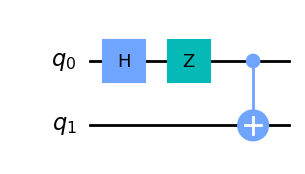

In [44]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.z(0)
qc_AB.cx(0,1)
qc_AB.draw('mpl')

In [47]:
phi_AB = qi.Statevector.from_instruction(qc_AB)
phi_AB.draw('latex', prefix='|\\Phi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [50]:
psi_AB.draw('latex', prefix='|\\Phi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [56]:
rho_psi_AB = qi.DensityMatrix(psi_AB)
rho_psi_AB.draw('latex', prefix='\\rho_{\\Psi} = ')

<IPython.core.display.Latex object>

In [57]:
rho_phi_AB = qi.DensityMatrix(phi_AB)
display(rho_phi_AB.draw('latex', prefix='\\rho_{\\Phi} = '))

<IPython.core.display.Latex object>

In [59]:
rho_sys = 1/4*rho_psi_AB + 3/4*rho_phi_AB
display(rho_sys.draw('latex', prefix='\\rho_{mr} = '))

<IPython.core.display.Latex object>

In [60]:
rho_m = qi.partial_trace(rho_sys,[0])
rho_r = qi.partial_trace(rho_sys,[1])

display(rho_m.draw('latex', prefix=" \\rho_{m} = "),
        rho_r.draw('latex', prefix=" \\rho_{r} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Representación en la esfera de Bloch de estados Mixtos.

In [6]:
rho_H_matrix = np.array([ [1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2] ])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

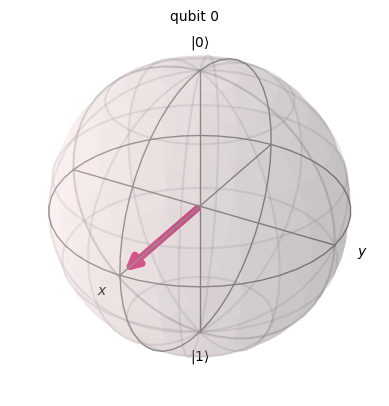

In [8]:
plot_bloch_multivector(rho_H.data)

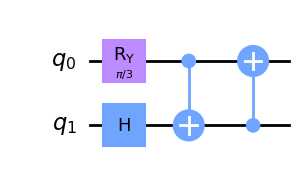

In [10]:
qc_CD = QuantumCircuit(2)
qc_CD.ry(np.pi/3,0)
qc_CD.h(1)
qc_CD.cx(0,1)
qc_CD.cx(1,0)
qc_CD.draw('mpl')

In [11]:
psi_CD = qi.Statevector.from_instruction(qc_CD)
psi_CD.draw('latex', prefix='|\\psi_{CD}\\rangle =')

<IPython.core.display.Latex object>

In [12]:
rho_CD = qi.DensityMatrix.from_instruction(qc_CD)
rho_CD.draw('latex', prefix='\\rho_{CD} =')

<IPython.core.display.Latex object>

In [13]:
rho_D = qi.partial_trace(rho_CD,[0])
rho_C = qi.partial_trace(rho_CD,[1])

display(rho_D.draw('latex', prefix=" \\rho_{D} = "),
        rho_C.draw('latex', prefix=" \\rho_{C} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

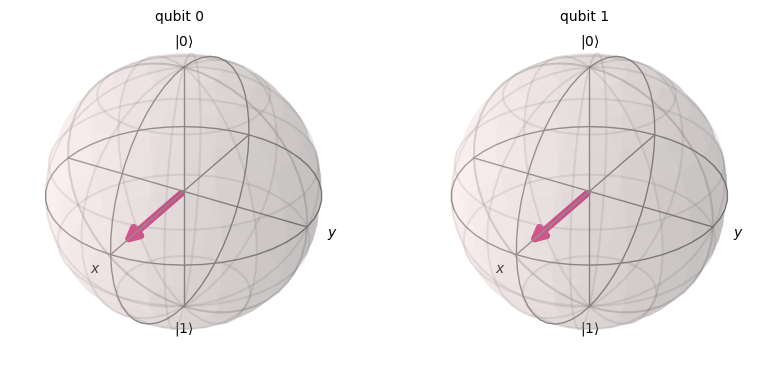

In [14]:
plot_bloch_multivector(rho_CD.data)